In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from numpy import genfromtxt
import sys
import math
import pandas as pd
from IPython.display import display, HTML
import matplotlib.lines as mlines
from matplotlib.pyplot import figure
from math import sqrt

In [17]:
x: int
y: int
content = []

def draw(f, a, b, c, d):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, 'ko')
    plt.plot(x, f)
    plt.grid()
    plt.show()

In [18]:
def cof_cor(Xs, Ys):
    X_mean = np.mean(Xs)
    Y_mean = np.mean(Ys)
    numerator = 0
    denominator_x = 0
    denominator_y = 0
    for x, y in zip(Xs, Ys):
        numerator += (x-X_mean)*(y-Y_mean)
        denominator_x += (x-X_mean) ** 2
        denominator_y += (y-Y_mean) ** 2
    return numerator / sqrt(denominator_x * denominator_y)

def lin_approx(Xs, Ys):
    A = np.array([[sum(Xs ** 2), sum(Xs)],[sum(Xs), len(Xs)]])
    B = np.array([sum(Xs*Ys), sum(Ys)])
    a, b = np.linalg.solve(A, B)
    return a, b

def linear(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    #Подсчет аппроксимации
    a, b = lin_approx(Xs, Ys)
    print(f'Коэффициент корреляции = {cof_cor(Xs, Ys)}')
    f = a * Xs + b
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nЛинейная аппроксимация\nf = {a} * x + {b}')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, 0, 0)

def squared(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    #Подсчет аппроксимации
    A = np.array([[len(Xs), sum(Xs), sum(Xs ** 2)],
                  [sum(Xs), sum(Xs ** 2), sum(Xs ** 3)],
                  [sum(Xs ** 2), sum(Xs ** 3), sum(Xs ** 4)]])
    B = np.array([sum(Ys), sum(Xs*Ys), sum((Xs**2)*Ys)])
    c, b, a = np.linalg.solve(A, B)
    f = a * Xs ** 2 + b * Xs + c
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #Мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nКвадратичная аппроксимация\nf = {a} * x^2 + {b} * x +{c}')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, c, 0)

def triple(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    #Подсчет аппроксимации
    A = np.array([[len(Xs), sum(Xs), sum(Xs ** 2), sum(Xs ** 3)],
                  [sum(Xs), sum(Xs ** 2), sum(Xs ** 3), sum(Xs ** 4)],
                  [sum(Xs ** 2), sum(Xs ** 3), sum(Xs ** 4), sum(Xs ** 5)],
                  [sum(Xs ** 3), sum(Xs ** 4), sum(Xs ** 5), sum(Xs ** 6)]])
    B = np.array([sum(Ys), sum(Xs*Ys), sum((Xs**2)*Ys), sum((Xs **3 )*Ys)])
    d, c, b, a = np.linalg.solve(A, B)
    f = a * Xs ** 3 + b * Xs ** 2 + c * Xs + d
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #Мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nТретичная аппроксимация\nf = {a} * x^3 + {b} * x^2 + {c} * x + {d}')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, c, d)
    return a, b, c, S, delta

def power(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    log_Xs = np.log(Xs)
    log_Ys = np.log(Ys)
    if True in np.isnan(log_Xs) or True in np.isnan(log_Ys):
        raise ValueError
    #Подсчет аппроксимации
    b, a = lin_approx(log_Xs, log_Ys)
    a = np.exp(a)
    f = a * (Xs ** b)
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #Мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nСтепенная аппроксимация\nf = {a} * x ** {b}')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, 0, 0)

def exponential(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    log_Ys = np.log(Ys)
    if True in np.isnan(log_Ys):
        raise ValueError
    #Подсчет аппроксимации
    b, a = lin_approx(Xs, log_Ys)
    a = np.exp(a)
    f = a * (np.exp(Xs * b))
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #Мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nЭкспоненциальная аппроксимация\nf = {a} * e**(x * {b})')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, 0, 0)
    return a, b, '-', S, delta

def logarithm(array):
    Xs = np.array(array[0])
    Ys = np.array(array[1])
    log_Xs = np.log(Xs)
    if True in np.isnan(log_Xs):
        raise ValueError
    #Подсчет аппроксимации
    a, b = lin_approx(log_Xs, Ys)
    f = a * (log_Xs) + b
    #СКО
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    #Мера отклонения
    S = sum(eps ** 2)
    print(f'\n\nЛогарифмическая аппроксимация\nf = {a} * ln(x) + {b}')
    print(f'Мера отклонения = {S}')
    print(f'СКО = {delta}\n\n')
    draw(f, a, b, 0, 0)
    return a, b, '-', S, delta

In [19]:
def run():
    again = True
    while again:
        again = False
        in_type = input('Введите:\n\t* k - если вводить с клавиатуры\n\t* f - если хотите вводить из файла\n')
        if in_type.strip() == 'k':
            line_x = input()
            content.append([float(x) for x in line_x.split(" ")])
            line_y = input()
            content.append([float(x) for x in line_y.split(" ")])
        elif in_type.strip() == 'f':
            with open("input.txt") as f:
              for line in f:
                content.append([float(x) for x in line.split(" ")])
            f.close()
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
    global x
    x = np.array(content[0])
    global y
    y = np.array(content[1])
    linear(content)
    squared(content)
    triple(content)
    power(content)
    exponential(content)
    logarithm(content)

lab45_input/test.csv

Введите:
	* k - если вводить с клавиатуры
	* f - если хотите вводить из файла
f
Коэффициент корреляции = 0.3917459046255321


Линейная аппроксимация
f = 0.1086969696969697 * x + 0.37213333333333337
Мера отклонения = 0.215072496969697
СКО = 0.1466535021640114




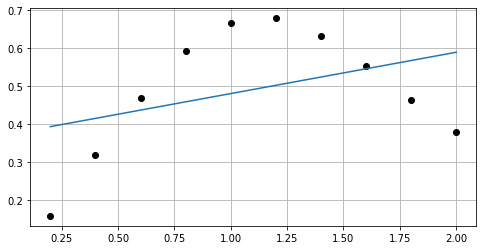



Квадратичная аппроксимация
f = -0.4996212121211979 * x^2 + 1.2078636363636035 * x +-0.06753333333331886
Мера отклонения = 0.004192375757575746
СКО = 0.020475291835712003




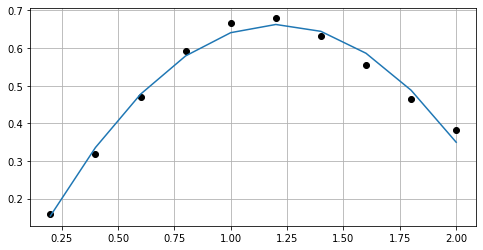



Третичная аппроксимация
f = 0.06983294483287979 * x^3 + -0.7300699300697105 * x^2 + 1.4204351204349117 * x + -0.11546666666661744
Мера отклонения = 0.003228345920745921
СКО = 0.017967598394738014




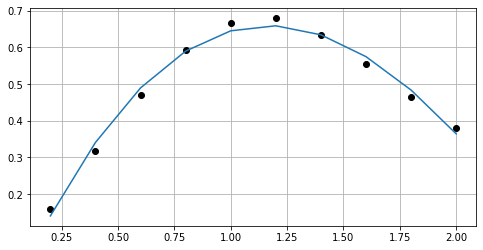



Степенная аппроксимация
f = 0.4769530595277907 * x ** 0.43762360608042794
Мера отклонения = 0.20224322072624246
СКО = 0.14221224304758098




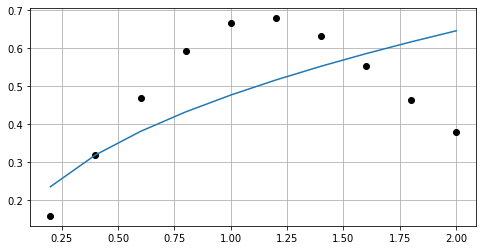



Экспоненциальная аппроксимация
f = 0.31050865647035136 * e**(x * 0.3508027500223356)
Мера отклонения = 0.255583656520769
СКО = 0.15986983971993246




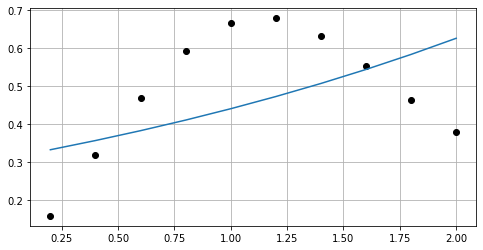



Логарифмическая аппроксимация
f = 0.14524289441897606 * ln(x) + 0.5060785607283772
Мера отклонения = 0.1520460441937742
СКО = 0.12330695203181945




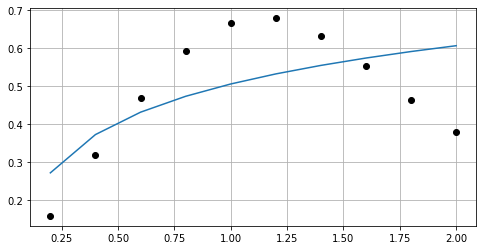

In [20]:
run()